In [181]:
import glob
import cv2
import random
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from PIL import Image
import numpy as np
import pandas as pd
from scipy import stats
%matplotlib inline

In [5]:
classes = [
  ("car", 33), ("motorbicycle", 34), ("bicycle", 35), ("person", 36),
  ("rider", 37), ("truck", 38), ("bus", 39), ("tricycle", 40),
  ("others", 0), ("rover", 1), ("sky", 17), ("car_groups", 161),
  ("motorbicycle_group", 162), ("bicycle_group", 163), ("person_group", 164),
  ("rider_group", 165), ("truck_group", 166), ("bus_group", 167),
  ("tricycle_group", 168), ("road", 49), ("siderwalk", 50),
  ("traffic_cone", 65), ("road_pile", 66), ("fence", 67),
  ("traffic_light", 81), ("pole", 82), ("traffic_sign", 83),
  ("wall", 84), ("dustbin", 85), ("billboard", 86), ("building", 97),
  ("bridge", 98), ("tunnel", 99), ("overpass", 100), ("vegatation", 113)
]

In [6]:
len(classes)

35

In [2]:
train_images = glob.glob('./train_color/*.jpg')
train_labels = glob.glob('./train_label/*.png')
print("Number of images:", len(train_images))
print("Number of labels:", len(train_labels))

train_set, train_sample, label_set, label_sample = train_test_split(train_images, train_labels, test_size=0.1)
print("Number samples:", len(label_sample))



Number of images: 39222
Number of labels: 39222
Number samples: 3923


#### Example of training images

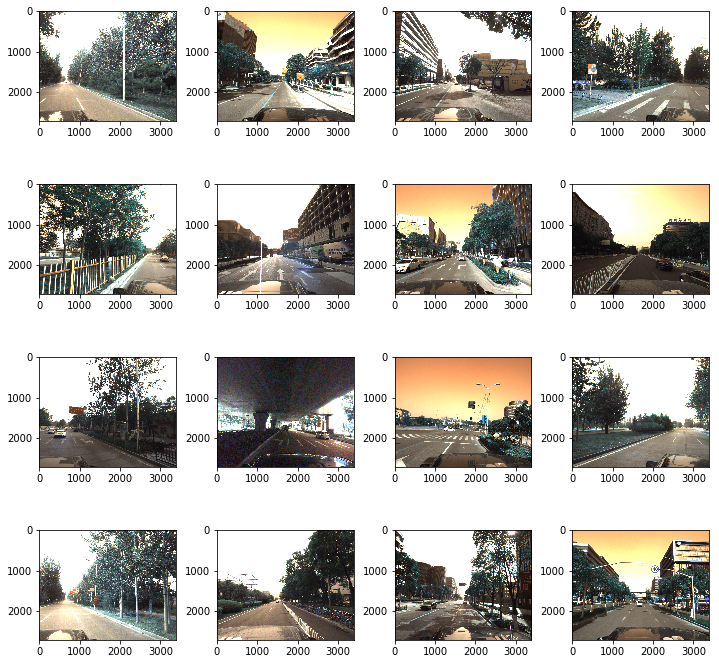

In [3]:
fig, draws = plt.subplots(4,4, figsize=(12,12))
draws = draws.reshape(-1)
fig.subplots_adjust(wspace=0.3, hspace=0.3)
for i in range(16):
    im = cv2.imread(train_sample[i])
    draws[i].imshow(im)

#### Examples of label images

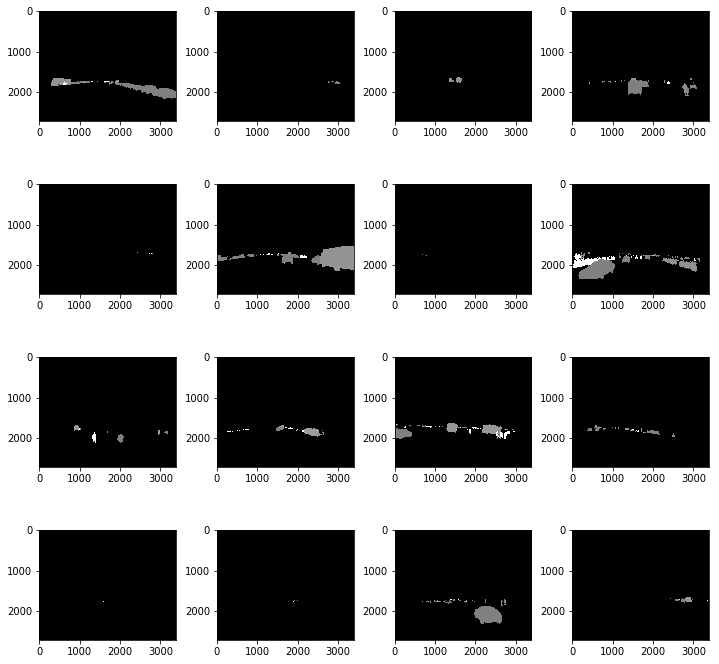

In [4]:
fig, draws = plt.subplots(4,4, figsize=(12,12))
draws = draws.reshape(-1)
fig.subplots_adjust(wspace=0.3, hspace=0.3)
for i in range(16):
    im = cv2.imread(label_sample[i])
    draws[i].imshow(im)

In [ ]:
np.dstack

In [38]:
im1 = cv2.imread(label_sample[1])
im2 = cv2.imread(train_sample[1])

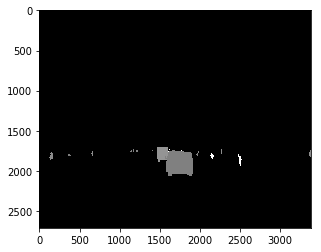

In [39]:
plt.imshow(im1)

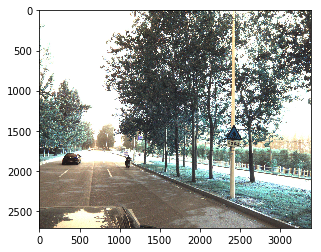

In [40]:
plt.imshow(im2)

In [43]:
im3 = im1*im2

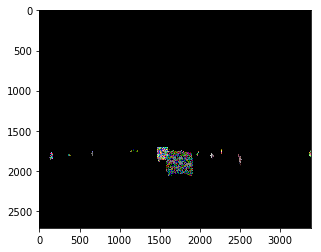

In [44]:
plt.imshow(im3)

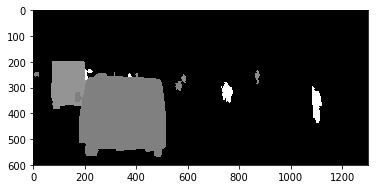

In [73]:
plt.imshow(im1[1500:2100, 1400:2700])

In [51]:
im = cv2.imread(train_sample[3], cv2.IMREAD_UNCHANGED)
label = cv2.imread(label_sample[3], cv2.IMREAD_UNCHANGED)

In [183]:
def get_masks_from_image(image_id, image):
    """
    image: numpy array containing all instances
    return numpy array of masks and array of ids
    """
    meta_data = {}
    meta_stats = {}
    stats_ = []
    ids = []
    intances_ids = np.unique(image)
    intances_ids = np.delete(intances_ids, np.where(intances_ids == 255))
    masks_shape = (image.shape[0], image.shape[1], intances_ids.shape[0])
    masks = np.zeros(masks_shape, dtype=np.bool)
    meta_data['image'] = image_id

    for instance in intances_ids:
        class_id = int(instance/1000)
        s_class_id = str(class_id)
        meta_data[s_class_id] = 0
        meta_stats[s_class_id] =[]

    for i in range(intances_ids.shape[0]):
        class_id = int(intances_ids[i]/1000)
        ids.append(class_id)
        meta_data[str(class_id)] += 1

        masks[:, :, i] = (image == intances_ids[i])
        meta_stats[str(class_id)].append(masks[:, :, i].sum())

    for key in meta_stats.keys():
        obs = {}
        mode = stats.mode(meta_stats[key])
        desc = stats.describe(meta_stats[key])
        obs['image'] = image_id
        obs['id'] = key
        obs['mode'] = mode.mode[0]
        obs['min'] = desc.minmax[0]
        obs['max'] = desc.minmax[1]
        obs['variance'] = round(desc.variance, 4)
        obs['skewness'] = round(desc.skewness, 4)
        obs['mean'] = round(desc.mean, 4)
        obs['kurtosis'] = round(desc.kurtosis, 4)
        stats_.append(obs)
        

    return masks, ids, meta_data, stats_

In [194]:
def create_labels_data(images_files):
    data_ = []
    stats_obs = []
    for label in images_files:
        im = cv2.imread(label, cv2.IMREAD_UNCHANGED)
        _, _, data, stats_ = get_masks_from_image(label, im)

        data_.append(data)
        stats_obs.extend(stats_)
    return data_, stats_obs

In [195]:
data_, stats_obs = create_labels_data(label_sample[:5])

/Users/ram/miniconda3/envs/ml-dev/lib/python3.6/site-packages/numpy/core/fromnumeric.py:3194: RuntimeWarning: Degrees of freedom <= 0 for slice
  **kwargs)
/Users/ram/miniconda3/envs/ml-dev/lib/python3.6/site-packages/numpy/core/_methods.py:127: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


In [196]:
dt=pd.DataFrame(data_).fillna(0.0)
dts=pd.DataFrame(stats_obs).fillna(0.0)

In [192]:
dt.head()

,33,34,36,38,39,40,65,image
0,38,0.0,0.0,4.0,3.0,0.0,1.0,./train_label/170927_064507170_Camera_5_instan...
1,6,0.0,0.0,0.0,1.0,0.0,0.0,./train_label/170908_065132138_Camera_5_instan...
2,4,0.0,0.0,2.0,0.0,0.0,0.0,./train_label/171206_032958398_Camera_6_instan...
3,14,1.0,10.0,1.0,0.0,0.0,1.0,./train_label/171206_032659100_Camera_6_instan...
4,3,0.0,0.0,1.0,0.0,1.0,1.0,./train_label/170908_085254019_Camera_5_instan...


In [193]:
dts.head()

,id,image,kurtosis,max,mean,min,mode,skewness,variance
0,33,./train_label/170927_064507170_Camera_5_instan...,19.1109,120594,7387.7105,98,98,4.3659,4.653739e+08
1,38,./train_label/170927_064507170_Camera_5_instan...,-0.9900,55070,21004.2500,1324,1324,0.7945,5.830070e+08
2,39,./train_label/170927_064507170_Camera_5_instan...,-1.5000,294,212.3333,139,139,0.1944,6.058333e+03
3,65,./train_label/170927_064507170_Camera_5_instan...,-3.0000,8062,8062.0000,8062,8062,0.0000,0.000000e+00
4,33,./train_label/170908_065132138_Camera_5_instan...,0.1580,7404,2121.6667,38,38,1.2641,7.888340e+06


In [198]:
data_, stats_obs = create_labels_data(train_labels)

/Users/ram/miniconda3/envs/ml-dev/lib/python3.6/site-packages/numpy/core/fromnumeric.py:3194: RuntimeWarning: Degrees of freedom <= 0 for slice
  **kwargs)
/Users/ram/miniconda3/envs/ml-dev/lib/python3.6/site-packages/numpy/core/_methods.py:127: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


In [200]:
dt=pd.DataFrame(data_).fillna(0.0)
dts=pd.DataFrame(stats_obs).fillna(0.0)

In [224]:
dts.to_csv('../data/train_labels_stats.csv', columns=list(reversed(dts.columns)), index=False)

In [225]:
dt.to_csv('../data/train_labels_instance_counts.csv', columns=list(reversed(dt.columns)), index=False)